In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [133]:
df = pd.read_csv('../out.csv')
X = np.load('../data/test.npz')['X']
x = X.sum(axis=(1,2,3))

In [140]:
df.head()
y, y_pred = df['y_true'], df['y_pred']
nhits = df['nhits']

In [137]:
#bins = np.linspace(y_pred.min(), y_pred.max(), 10)
bins = np.arange(1, 12)
indices = [ (y>=a) & (y<b) for a, b in zip(bins[0:-1], bins[1:])]
preds = [y_pred[ind] for ind in indices]
reals = [y[ind] for ind in indices]

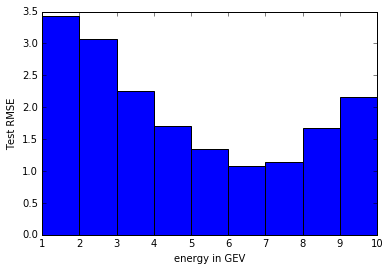

In [138]:
rmse = [ np.sqrt(((p-r)**2).mean()) for p,r in zip(preds, reals)]
rmse = np.array(rmse)
plt.xticks(bins)
plt.bar(bins[0:-1], rmse, align='edge', width=1)
plt.xlabel('energy in GEV')
plt.ylabel('Test RMSE')

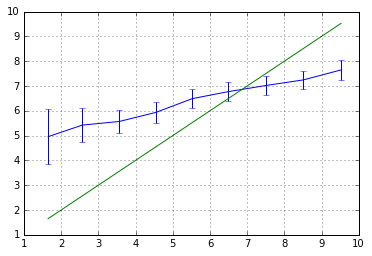

In [139]:
pred_mean = map(np.mean, preds)
pred_std = np.array(map(np.mean, preds)) / np.sqrt(np.array(map(len, preds)))
true_mean = map(np.mean, reals)
plt.errorbar(true_mean, pred_mean, yerr=pred_std)
plt.grid()
plt.plot(true_mean, true_mean)

(array([ 828.,  344.,  298.,  230.,  167.,  110.,   59.,   24.,   11.,    3.]),
 array([  19. ,   36.6,   54.2,   71.8,   89.4,  107. ,  124.6,  142.2,
         159.8,  177.4,  195. ]),
 <a list of 10 Patch objects>)

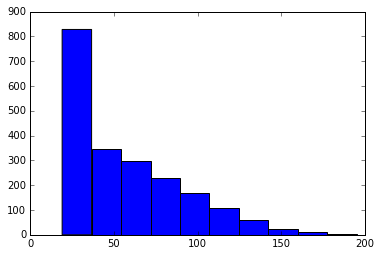

In [141]:
plt.hist(nhits)

[        nan  1.56575848  1.96748502  1.96666239  1.75615514  1.60437871
  1.64436658  1.49112596  1.42402469  1.4266556   1.36283251  1.30947092
  1.3173157   1.07720474  0.8800483   1.32633686  0.73759603  0.96926695
  0.08551407]


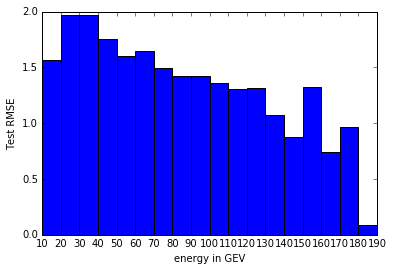

In [199]:
bins = np.arange(0, 200, 10)
indices = [ (nhits>=a) & (nhits<b) for a, b in zip(bins[0:-1], bins[1:])]
bin_means = [(a+b)/2 for a, b in zip(bins[0:-1], bins[1:])]
preds = [y_pred[ind] for ind in indices]
reals = [y[ind] for ind in indices]

rmse = [ np.sqrt(((p-r)**2).mean()) for p,r in zip(preds, reals)]
rmse = np.array(rmse)
plt.xticks(bins)
plt.bar(bins[0:-1], rmse, align='edge', width=10)
print(rmse)
#plt.plot(bins[0:-1], rmse)
plt.xlabel('energy in GEV')
plt.ylabel('Test RMSE')

[nan, 4.600057522456667, 5.75256340233783, 6.4892923642185165, 6.241861456691537, 6.343935719945171, 6.818216056986139, 7.177198379270262, 7.355471259182138, 7.4997734196329615, 7.8796668481285375, 8.129239754599507, 8.228122949600401, 8.29041504859853, 8.609722185132, 8.881565703286668, 8.7956384420425, 9.429844220476667, 9.32983493805]
[nan, 5.21964406967, 5.796504648225945, 6.682592387835961, 6.227523168124603, 6.277301724661822, 6.908232240514545, 7.183273615375419, 7.4890528558524245, 7.538856365242755, 8.136731276351236, 8.222524048851966, 8.499574899673402, 8.447347655016468, 9.097523307801, 8.768630239698886, 8.9893227815625, 8.715531667076666, 9.24432086945]


<Container object of 3 artists>

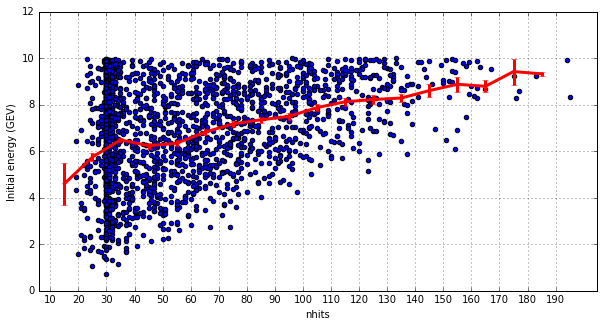

In [219]:
bins = np.arange(0, 200, 10)
indices = [ (nhits>=a) & (nhits<b) for a, b in zip(bins[0:-1], bins[1:])]
bin_means = [(a+b)/2 for a, b in zip(bins[0:-1], bins[1:])]
preds = [y_pred[ind] for ind in indices]
reals = [y[ind] for ind in indices]
pred_means = [p.mean() for p in preds]
rmse = [ np.sqrt(((p-r)**2).mean()) / np.sqrt(len(r)) for p,r in zip(preds, reals)]
rmse = np.array(rmse)

print(pred_means)
print(real_means)

fig = plt.figure(figsize=(10, 5))
plt.xticks(bins)
plt.scatter(nhits, y)
plt.grid()
plt.xlabel('nhits')
plt.ylabel('Initial energy (GEV)')
plt.errorbar(bin_means, pred_means, yerr=rmse, c='red', linewidth=3)

In [218]:
print(rmse)

[        nan  1.56575848  1.96748502  1.96666239  1.75615514  1.60437871
  1.64436658  1.49112596  1.42402469  1.4266556   1.36283251  1.30947092
  1.3173157   1.07720474  0.8800483   1.32633686  0.73759603  0.96926695
  0.08551407]
